# Heart Disease Risk Analysis Using Key Health Indicators: A Comprehensive Study with CDC 2022 Data 

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency


sns.set_theme(style="whitegrid")

In [3]:
# Load the dataset
file_path = "../data/raw/heart.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [31]:
# Display the number of rows and columns in the dataset
len(df)

445132

## Preprocessing Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [62]:
# Get chi-square test for all variables relative to the target variable

def chi_square_of_df_cols(df: pd.DataFrame, col1: str, col2: str) -> float:
    contingency_table = pd.crosstab(df[col1], df[col2])
    _, p, _, _ = chi2_contingency(contingency_table)
    return p

In [63]:
target = 'HadHeartAttack'
chi_scores = []

for column in df.columns:
    chi_scores.append((column, chi_square_of_df_cols(df, column, target)))
        
chi_scores_df = pd.DataFrame(chi_scores, columns=['Variable', 'P-value'])

chi_scores_df

,Variable,P-value
0,State,6.797591e-182
1,Sex,0.000000e+00
2,GeneralHealth,0.000000e+00
3,PhysicalHealthDays,0.000000e+00
4,MentalHealthDays,1.169758e-242
5,LastCheckupTime,0.000000e+00
6,PhysicalActivities,0.000000e+00
7,SleepHours,0.000000e+00
8,RemovedTeeth,0.000000e+00
9,HadHeartAttack,0.000000e+00


In [74]:
chi_scores_target = 0.001

# Get the variables that are statistically significant
significant_variables = chi_scores_df[chi_scores_df['P-value'] < chi_scores_target]

significant_variables.sort_values(by='P-value')


,Variable,P-value
1,Sex,0.000000e+00
2,GeneralHealth,0.000000e+00
3,PhysicalHealthDays,0.000000e+00
5,LastCheckupTime,0.000000e+00
7,SleepHours,0.000000e+00
6,PhysicalActivities,0.000000e+00
9,HadHeartAttack,0.000000e+00
8,RemovedTeeth,0.000000e+00
14,HadCOPD,0.000000e+00
11,HadStroke,0.000000e+00


In [80]:
significant_variables

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [76]:
significant_columns = significant_variables['Variable'].to_list()

# Drop the variables that are not statistically significant

df = df[significant_columns]

# Display the first 5 rows of the dataset
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [37]:
columns = [
    "State",
    "RemovedTeeth",
    "RaceEthnicityCategory",
    "ChestScan",
    "TetanusLast10Tdap",
    "HighRiskLastYear",
]

df.drop(columns=columns, inplace=True)

In [38]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,No,No,No,...,Not at all (right now),Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,No
1,Female,Excellent,0.0,0.0,NaN,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,Age 80 or older,1.60,68.04,26.57,No,No,No,No,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,Age 55 to 59,1.57,63.50,25.61,No,No,No,No,Yes
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,Yes,...,Never used e-cigarettes in my entire life,NaN,1.65,63.50,23.30,No,No,Yes,Yes,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,No


### Remove duplicates

In [39]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Display the columns with missing values
missing_values[missing_values > 0].sort_values(ascending=False).to_frame(
    "Missing Values"
)

,Missing Values
PneumoVaxEver,77040
HIVTesting,66127
CovidPos,50764
BMI,48806
FluVaxLast12,47121
AlcoholDrinkers,46574
WeightInKilograms,42078
ECigaretteUsage,35660
SmokerStatus,35462
HeightInMeters,28652


In [40]:
# Get duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows from the dataset and update the dataframe in place
df.drop_duplicates(inplace=True)

print(f"Removed {duplicate_rows.shape[0]} duplicate rows")

Removed 4333 duplicate rows


### Remove missing values

In [41]:
# Fill missing values in the dataset with the mode for categorical columns and the mean for numerical columns

for col in df.columns:
    if df[col].dtype == 'object':
        min_value = df[col].dropna().mode().values[0] 
        df[col] = df[col].fillna(min_value)
    else:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value).round(2)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440799 entries, 0 to 445131
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        440799 non-null  object 
 1   GeneralHealth              440799 non-null  object 
 2   PhysicalHealthDays         440799 non-null  float64
 3   MentalHealthDays           440799 non-null  float64
 4   LastCheckupTime            440799 non-null  object 
 5   PhysicalActivities         440799 non-null  object 
 6   SleepHours                 440799 non-null  float64
 7   HadAngina                  440799 non-null  object 
 8   HadStroke                  440799 non-null  object 
 9   HadAsthma                  440799 non-null  object 
 10  HadSkinCancer              440799 non-null  object 
 11  HadCOPD                    440799 non-null  object 
 12  HadDepressiveDisorder      440799 non-null  object 
 13  HadKidneyDisease           440799 

### Categorical to Numerical Conversion

In [43]:
mappings = {
    "Sex": {"Female": 0, "Male": 1},
    "GeneralHealth": {"Excellent": 0, "Very good": 1, "Good": 2, "Fair": 3, "Poor": 4},
    "LastCheckupTime": {
        "Within past year (anytime less than 12 months ago)": 1,
        "Within past 2 years (1 year but less than 2 years ago)": 2,
        "Within past 5 years (2 years but less than 5 years ago)": 3,
        "5 or more years ago": 4,
    },
    "HadDiabetes": {
        "Yes": 1,
        "Yes, but only during pregnancy (female)": 2,
        "No": 3,
        "No, pre-diabetes or borderline diabetes": 4,
    },
    "SmokerStatus": {
        "Current smoker - now smokes every day": 1,
        "Current smoker - now smokes some days": 2,
        "Former smoker": 3,
        "Never smoked": 4,
    },
    "ECigaretteUsage": {
        "Never used e-cigarettes in my entire life": 1,
        "Use them every day": 2,
        "Use them some days": 3,
        "Not at all (right now)": 4,
    },
    "AgeCategory": {
        "Age 18 to 24": 1,
        "Age 25 to 29": 2,
        "Age 30 to 34": 3,
        "Age 35 to 39": 4,
        "Age 40 to 44": 5,
        "Age 45 to 49": 6,
        "Age 50 to 54": 7,
        "Age 55 to 59": 8,
        "Age 60 to 64": 9,
        "Age 65 to 69": 10,
        "Age 70 to 74": 11,
        "Age 75 to 79": 12,
        "Age 80 or older": 13,
    },
    "CovidPos": {
        "Yes": 1,
        "No": 2,
        "Tested positive using home test without a health professional": 3,
    },
    "Boolean": {"Yes": 1, "No": 0},
}


def map_columns(df):
    for column, mapping in mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)

def preprocess_data(df):
    # Apply mappings to columns
    map_columns(df)
    
    # Map all remaining object columns to Boolean
    for column in df.columns:
        if column not in mappings and df[column].dtype == "object":
            df[column] = df[column].map(mappings["Boolean"])

preprocess_data(df)

In [44]:
df.dtypes

Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                   int64
ECigaretteUsage                int64
AgeCategory                    int64
HeightInMeters               float64
WeightInKilograms            float64
B

In [45]:
# Save the preprocessed dataset to a CSV file
df.to_csv("../data/processed/heart.csv", index=False)

$# Data exploration

### Get outliers and treat them

<Axes: xlabel='SleepHours'>

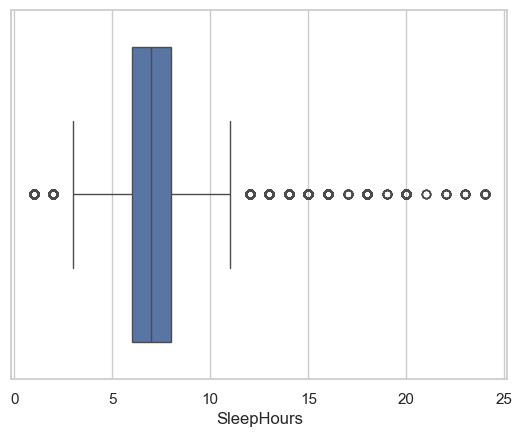

In [46]:
# Boxplot of SleepHours variable
sns.boxplot(x=df["SleepHours"])

<Axes: xlabel='HeightInMeters'>

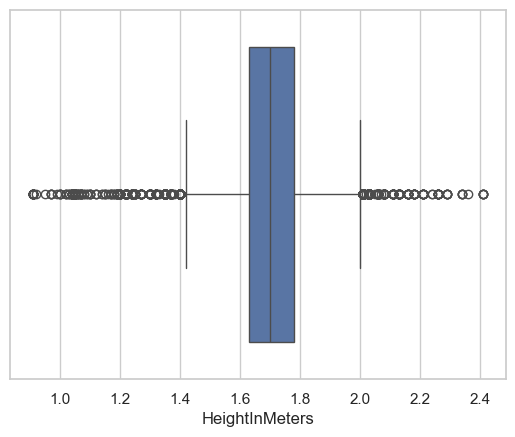

In [47]:
# Boxplot of HeightInMeters variable
sns.boxplot(x=df["HeightInMeters"])

<Axes: xlabel='WeightInKilograms'>

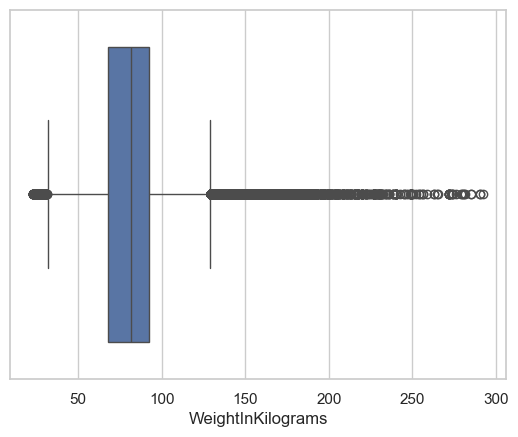

In [48]:
# Boxplot of WeightInKilograms variable
sns.boxplot(x=df["WeightInKilograms"])

In [49]:
len(df)

440799

In [50]:
def get_outliners(df: pd.DataFrame, column: str, threshold: float = 1.5) -> pd.DataFrame:
    q1 = df[column].quantile(0.25) # 25th percentile
    q3 = df[column].quantile(0.75) # 75th percentile
    
    iqr = q3 - q1 # Interquartile range
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column]).round(2) # Replace outliners with lower bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column]).round(2) # Replace outliners with upper bound
    
    return df

df = sleep_hours_outliners = get_outliners(df, "SleepHours")
df = height_in_meters_outliners = get_outliners(df, "HeightInMeters")
df = weight_in_kilograms_outliners = get_outliners(df, "WeightInKilograms")

# Re calculate the BMI after removing outliners and round to 2 decimal places
df["BMI"] = (df["WeightInKilograms"] / (df["HeightInMeters"] ** 2)).round(2)

In [51]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'CovidPos'],
      dtype='object')

In [52]:
# Inverse mappings for the columns
inverse_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in mappings.items()}

inverse_mappings

{'Sex': {0: 'Female', 1: 'Male'},
 'GeneralHealth': {0: 'Excellent',
  1: 'Very good',
  2: 'Good',
  3: 'Fair',
  4: 'Poor'},
 'LastCheckupTime': {1: 'Within past year (anytime less than 12 months ago)',
  2: 'Within past 2 years (1 year but less than 2 years ago)',
  3: 'Within past 5 years (2 years but less than 5 years ago)',
  4: '5 or more years ago'},
 'HadDiabetes': {1: 'Yes',
  2: 'Yes, but only during pregnancy (female)',
  3: 'No',
  4: 'No, pre-diabetes or borderline diabetes'},
 'SmokerStatus': {1: 'Current smoker - now smokes every day',
  2: 'Current smoker - now smokes some days',
  3: 'Former smoker',
  4: 'Never smoked'},
 'ECigaretteUsage': {1: 'Never used e-cigarettes in my entire life',
  2: 'Use them every day',
  3: 'Use them some days',
  4: 'Not at all (right now)'},
 'AgeCategory': {1: 'Age 18 to 24',
  2: 'Age 25 to 29',
  3: 'Age 30 to 34',
  4: 'Age 35 to 39',
  5: 'Age 40 to 44',
  6: 'Age 45 to 49',
  7: 'Age 50 to 54',
  8: 'Age 55 to 59',
  9: 'Age 60 t

In [53]:
def inverse_map_columns(df):
    for column, mapping in inverse_mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)

In [54]:
df_copy = df.copy()
inverse_map_columns(df_copy)

In [55]:
df_copy.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,0,0,0,...,Not at all (right now),Age 80 or older,1.70,83.08,28.75,0,0,1,0,No
1,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,0,0,0,...,Never used e-cigarettes in my entire life,Age 80 or older,1.60,68.04,26.58,0,0,0,0,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,0,0,0,...,Never used e-cigarettes in my entire life,Age 55 to 59,1.57,63.50,25.76,0,0,0,0,Yes
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,0,0,1,...,Never used e-cigarettes in my entire life,Age 65 to 69,1.65,63.50,23.32,0,0,1,1,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,0,0,0,...,Never used e-cigarettes in my entire life,Age 40 to 44,1.57,53.98,21.90,1,0,0,1,No


Text(0.5, 1.0, 'Distribution of Gender')

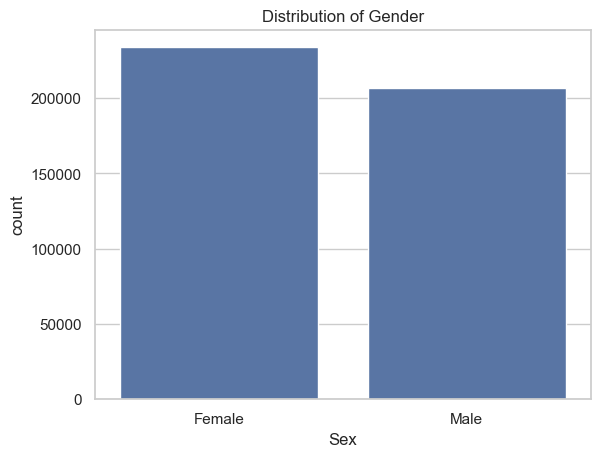

In [56]:
# Sex variable
sns.countplot(x="Sex", data=df_copy)
plt.title("Distribution of Gender")

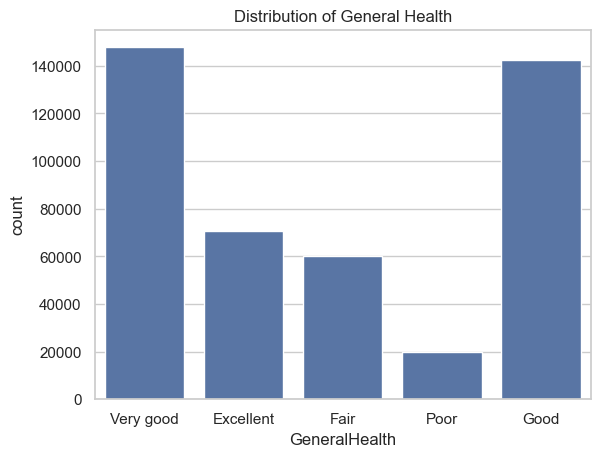

In [57]:
# GeneralHealth variable
sns.countplot(x="GeneralHealth", data=df_copy)
plt.title("Distribution of General Health")
plt.show()

KeyboardInterrupt: 

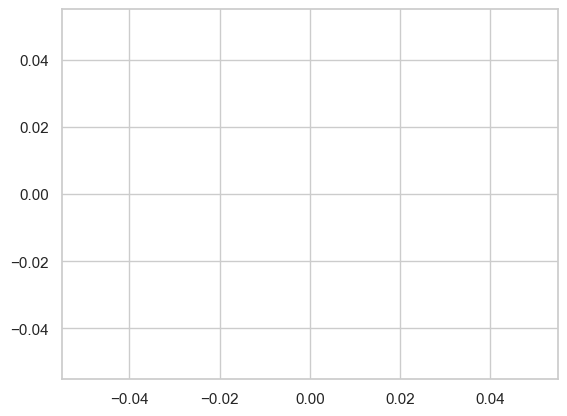

In [58]:
# HeightInMeters variable
sns.histplot(x="HeightInMeters", data=df_copy, bins=10, kde=True)
plt.title("Distribution of Height in Meters")
plt.show()

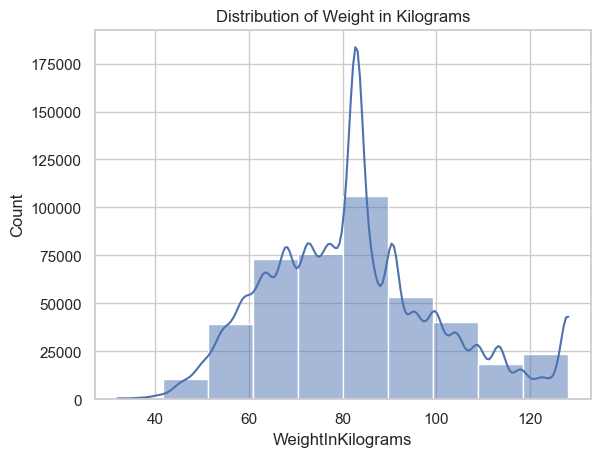

In [194]:
# WeightInKilograms variable
sns.histplot(x="WeightInKilograms", data=df_copy, bins=10, kde=True)
plt.title("Distribution of Weight in Kilograms")
plt.show()

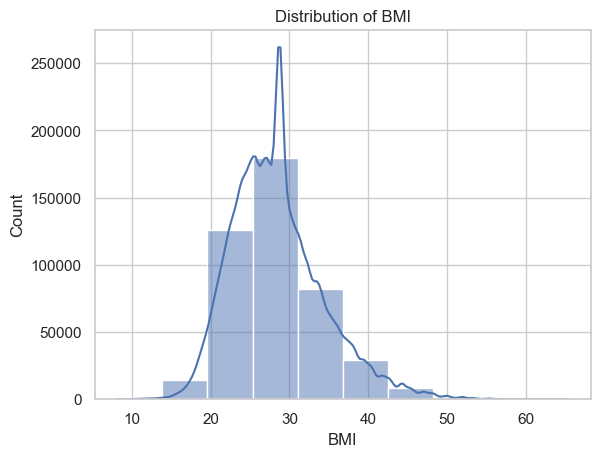

In [195]:
# BMI variable
sns.histplot(x="BMI", data=df_copy, bins=10, kde=True)
plt.title("Distribution of BMI")
plt.show()

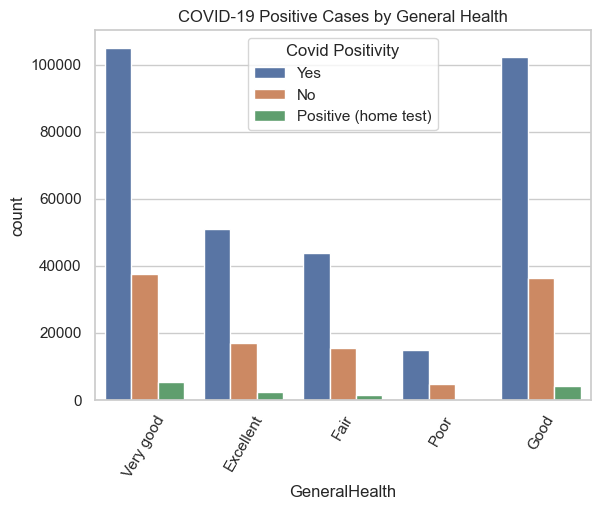

In [196]:
# GeneralHealth vs CovidPos
sns.countplot(x="GeneralHealth", hue="CovidPos", data=df_copy)
plt.title("COVID-19 Positive Cases by General Health")
plt.tick_params(axis="x", rotation=60)
plt.legend(["Yes", "No", "Positive (home test)"], title="Covid Positivity")
plt.show()

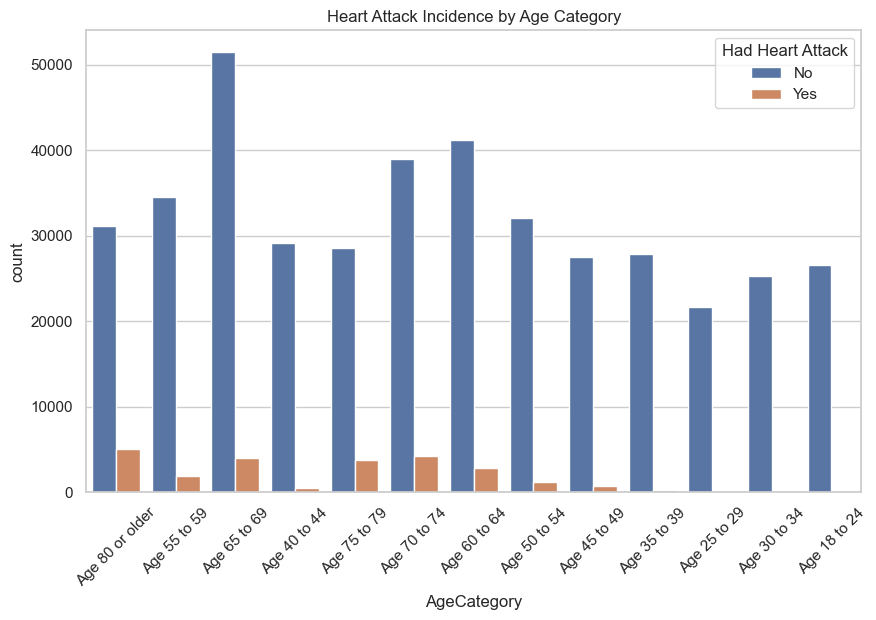

In [197]:
# AgeCategory vs HadHeartAttack
plt.figure(figsize=(10, 6))
sns.countplot(x="AgeCategory", hue="HadHeartAttack", data=df_copy)
plt.title("Heart Attack Incidence by Age Category")
plt.xticks(rotation=45)
plt.legend(["No", "Yes"], title="Had Heart Attack")
plt.show()


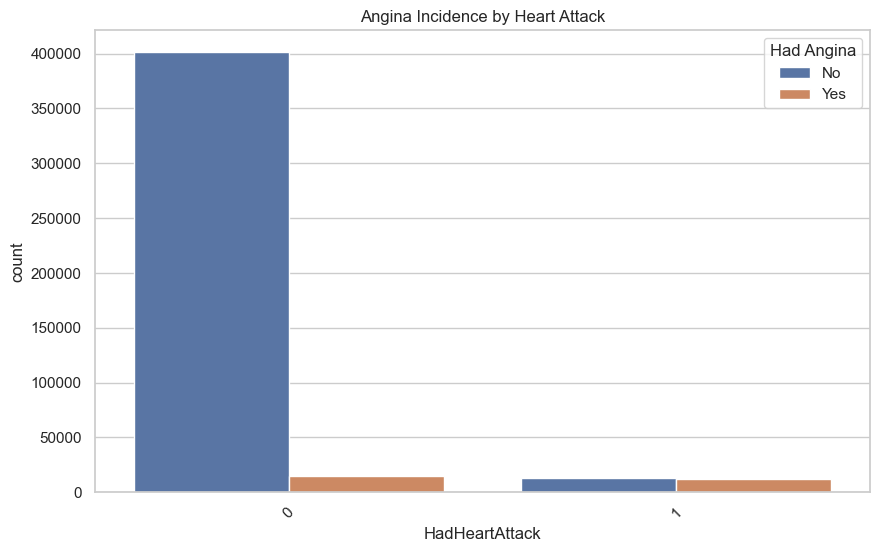

In [198]:
# HadHeartAttack vs HadAngina

plt.figure(figsize=(10, 6))
sns.countplot(x="HadHeartAttack", hue="HadAngina", data=df_copy)
plt.title("Angina Incidence by Heart Attack")
plt.xticks(rotation=45)
plt.legend(["No", "Yes"], title="Had Angina")
plt.show()

<Axes: xlabel='BMI'>

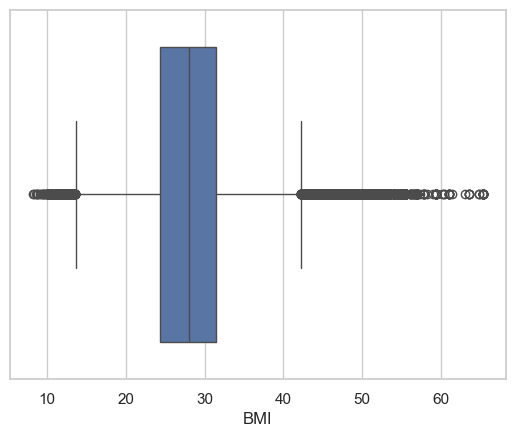

In [199]:
sns.boxplot(x=df["BMI"])

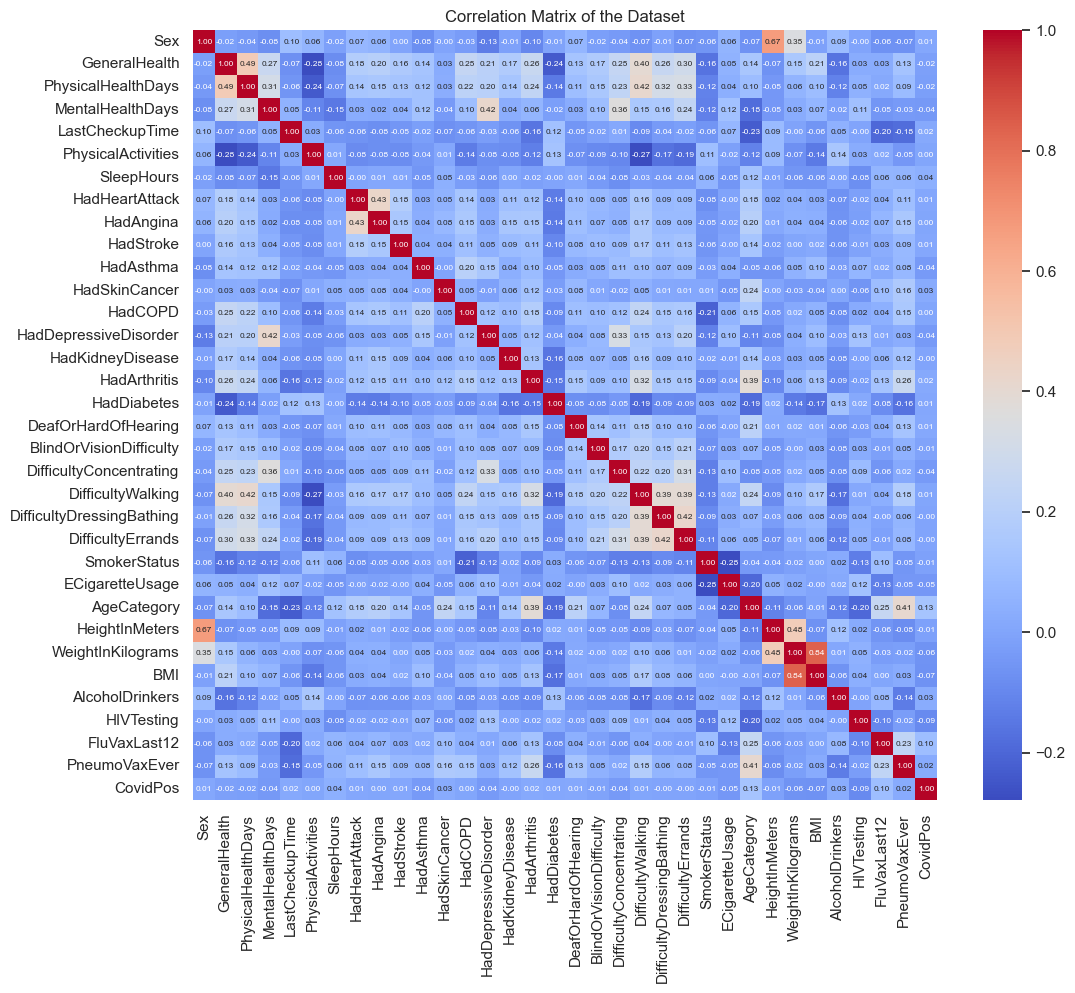

In [200]:
# Correlation matrix of the dataset
corr = df.corr()

# Heatmap of the correlation matrix with small font
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",  annot_kws={"size": 6})
plt.title("Correlation Matrix of the Dataset")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

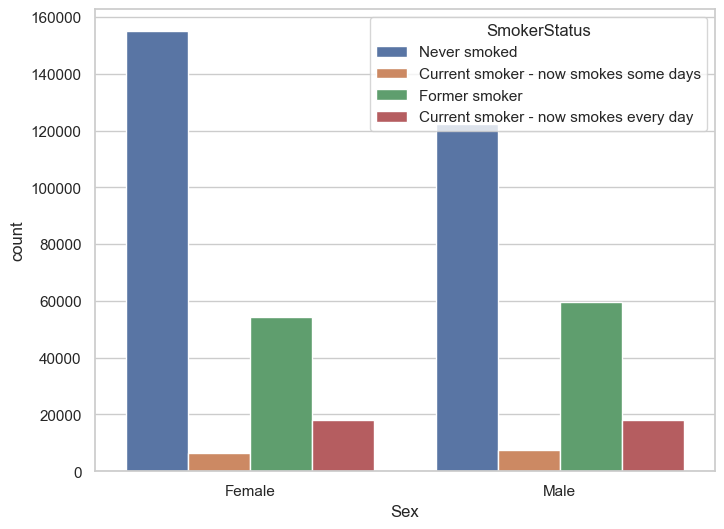

In [201]:
# Sex vs SmokerStatus Stacked Bar Chart

plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", hue="SmokerStatus", data=df_copy)

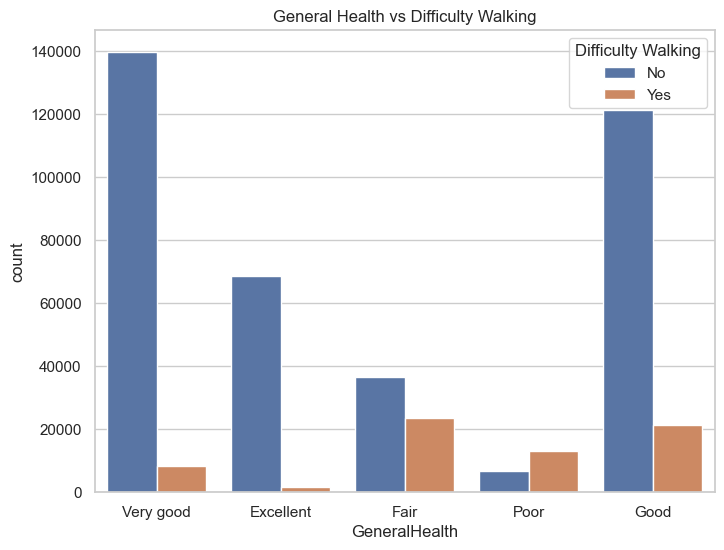

In [202]:
# General Health vs DifficultyWalking Stacked Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x="GeneralHealth", hue="DifficultyWalking", data=df_copy)
plt.title("General Health vs Difficulty Walking")
plt.legend(["No", "Yes"], title="Difficulty Walking")
plt.show()

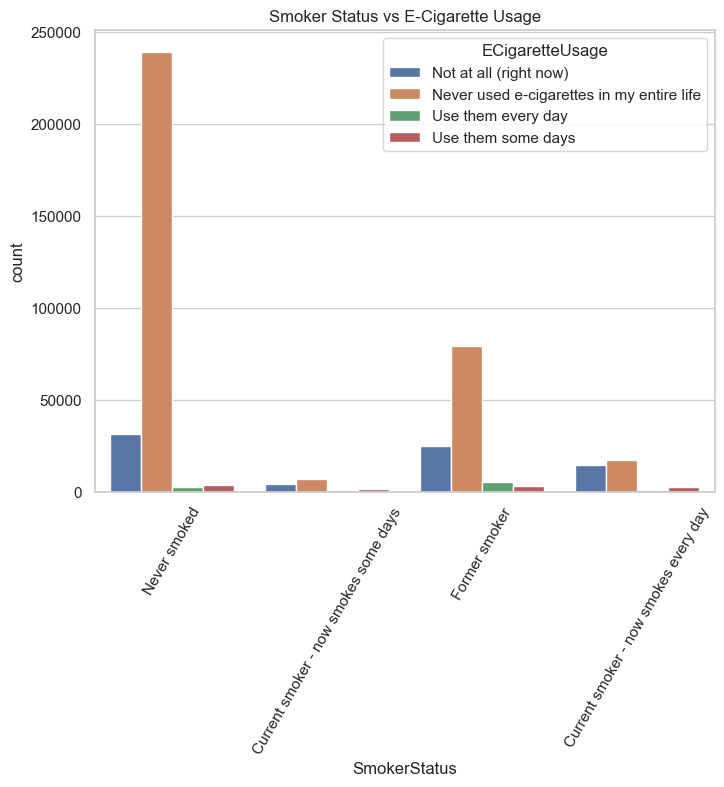

In [203]:
# SmokerStatus vs ECigaretteUsage Stacked Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x="SmokerStatus", hue="ECigaretteUsage", data=df_copy)
plt.xticks(rotation=60)
plt.title("Smoker Status vs E-Cigarette Usage")
plt.show()

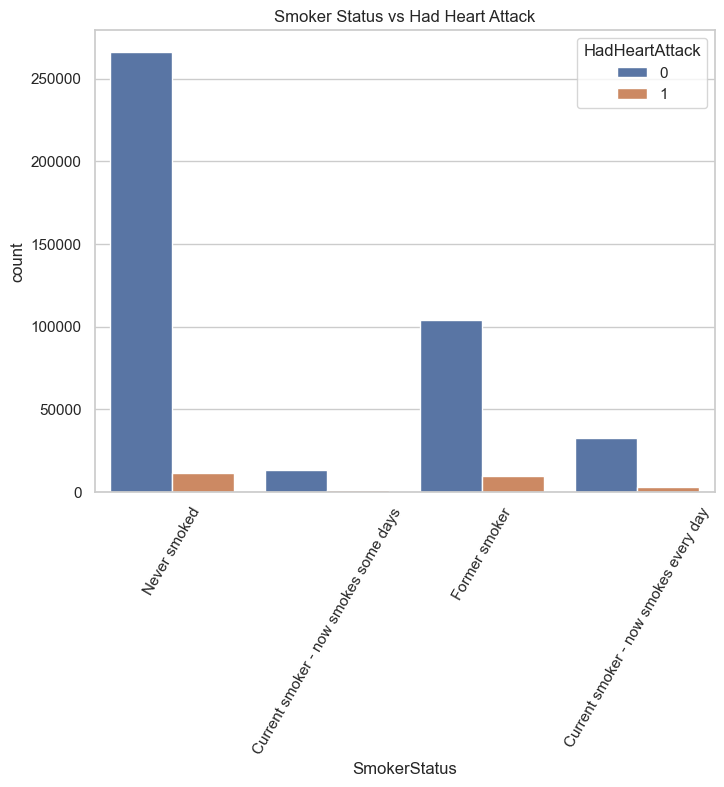

In [204]:
# SmokerStatus vs HadHeartAttack Stacked Bar Chart

plt.figure(figsize=(8, 6))
sns.countplot(x="SmokerStatus", hue="HadHeartAttack", data=df_copy)
plt.xticks(rotation=60)
plt.title("Smoker Status vs Had Heart Attack")
plt.show()

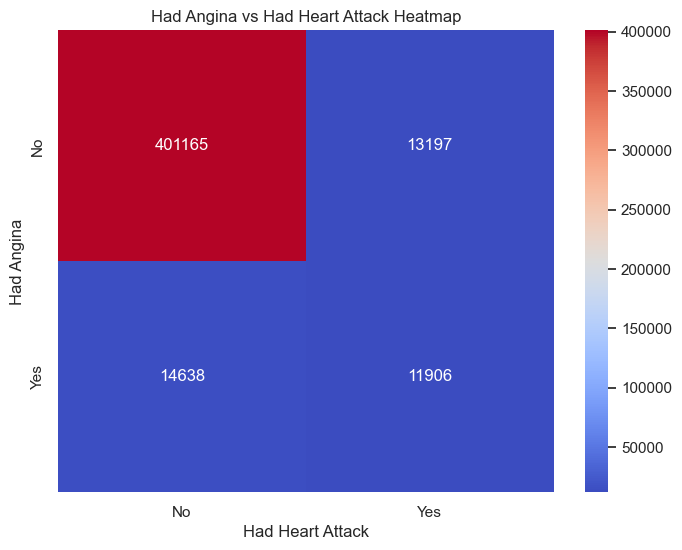

In [205]:
# HadAngina vs HadHeartAttack Heatmap

df_copy["HadAngina"] = df_copy["HadAngina"].replace({1: "Yes", 0: "No"})
df_copy["HadHeartAttack"] = df_copy["HadHeartAttack"].replace({1: "Yes", 0: "No"})

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df_copy["HadAngina"], df_copy["HadHeartAttack"]), annot=True, fmt="d", cmap="coolwarm")
plt.title("Had Angina vs Had Heart Attack Heatmap")
plt.xlabel("Had Heart Attack")
plt.ylabel("Had Angina")
plt.show()

In [206]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,0,1,0.0,0.0,1,0,8.0,0,0,0,...,4,13,1.70,83.08,28.75,0,0,1,0,2
1,0,0,0.0,0.0,1,0,6.0,0,0,0,...,1,13,1.60,68.04,26.58,0,0,0,0,2
2,0,1,2.0,3.0,1,1,5.0,0,0,0,...,1,8,1.57,63.50,25.76,0,0,0,0,1
3,0,0,0.0,0.0,1,1,7.0,0,0,0,...,1,10,1.65,63.50,23.32,0,0,1,1,2
4,0,3,2.0,0.0,1,1,9.0,0,0,0,...,1,5,1.57,53.98,21.90,1,0,0,1,2


In [207]:
df_copy.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,No,No,0,...,Not at all (right now),Age 80 or older,1.70,83.08,28.75,0,0,1,0,No
1,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,No,No,0,...,Never used e-cigarettes in my entire life,Age 80 or older,1.60,68.04,26.58,0,0,0,0,No
2,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,No,No,0,...,Never used e-cigarettes in my entire life,Age 55 to 59,1.57,63.50,25.76,0,0,0,0,Yes
3,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,No,No,0,...,Never used e-cigarettes in my entire life,Age 65 to 69,1.65,63.50,23.32,0,0,1,1,No
4,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,No,No,0,...,Never used e-cigarettes in my entire life,Age 40 to 44,1.57,53.98,21.90,1,0,0,1,No


## Data Modeling

In [208]:
# Select the features and target variable and drop the HadHeartAttack column from the features
label = df_copy["HadHeartAttack"]
df_features = df_copy.drop(columns=["HadHeartAttack"])

In [209]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_features, label, stratify=label, test_size=0.3, random_state=42)

# Select numerical and categorical columns
categorical_columns = df_features.select_dtypes(include=["object"]).columns
numerical_columns = df_features.select_dtypes(include=["int64", "float64"]).columns

In [210]:
# Show categorical
categorical_columns

Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'HadAngina', 'HadDiabetes',
       'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'CovidPos'],
      dtype='object')

In [211]:
# Show numerical
numerical_columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver'],
      dtype='object')

### Data Transform

In [212]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(), categorical_columns),
    ]
)

### Pipelines

In [213]:
# Define pipelines

pipelines = {
    "logistic_regression": make_pipeline(preprocessor, LogisticRegression()),
    "decision_tree": make_pipeline(preprocessor, DecisionTreeClassifier()),
    "random_forest": make_pipeline(preprocessor, RandomForestClassifier()),
    "knn": make_pipeline(preprocessor, KNeighborsClassifier()),
    "naive_bayes": make_pipeline(preprocessor, GaussianNB()),
    "gradient_boosting": make_pipeline(preprocessor, GradientBoostingClassifier()),
}

pipelines

{'logistic_regression': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
        'SleepHours', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
        'DifficultyConcentra...
        'DifficultyDressingBathing', 'DifficultyErrands', 'HeightInMeters',
        'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
        'FluVaxLast12', 'PneumoVaxEver'],
       dtype='object')),
                                                  ('cat', OneHotEncoder(),
                                                   Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'HadAngina', 'HadDiabetes',
        'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'CovidPos'],
       dtype='obje

In [214]:
# Pipelines models training
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    score = pipeline.score(x_test, y_test)
    print(f"{name} model trained successfully")
    print(f"Train score: {score}")
    print("-" * 50)

logistic_regression model trained successfully
Train score: 0.9462546873109955
--------------------------------------------------
decision_tree model trained successfully
Train score: 0.9087108382726503
--------------------------------------------------
random_forest model trained successfully
Train score: 0.945385266723116
--------------------------------------------------
knn model trained successfully
Train score: 0.9406828353695416
--------------------------------------------------
naive_bayes model trained successfully
Train score: 0.7627540220152413
--------------------------------------------------
gradient_boosting model trained successfully
Train score: 0.9468670618120237
--------------------------------------------------


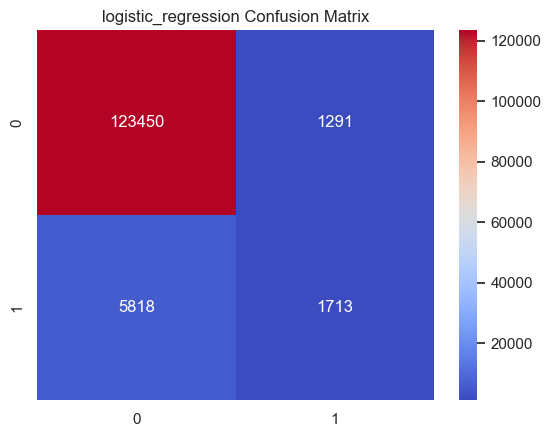

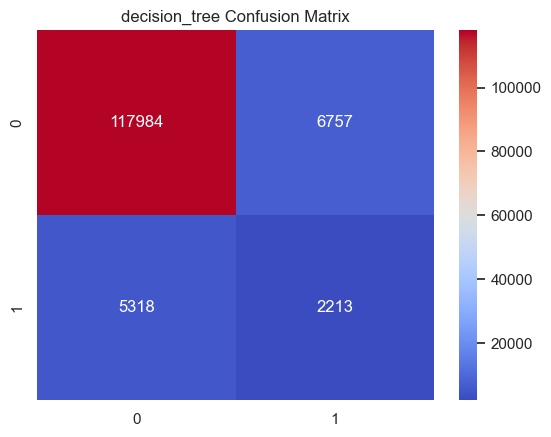

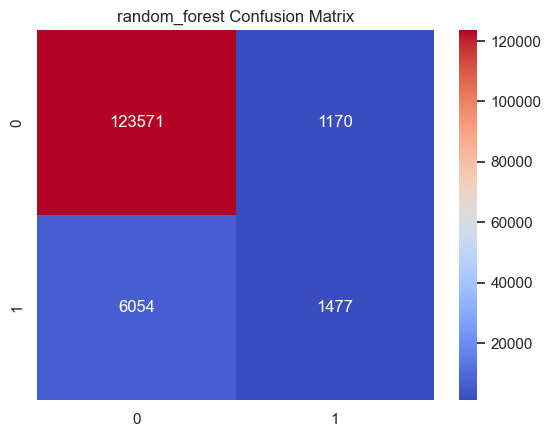

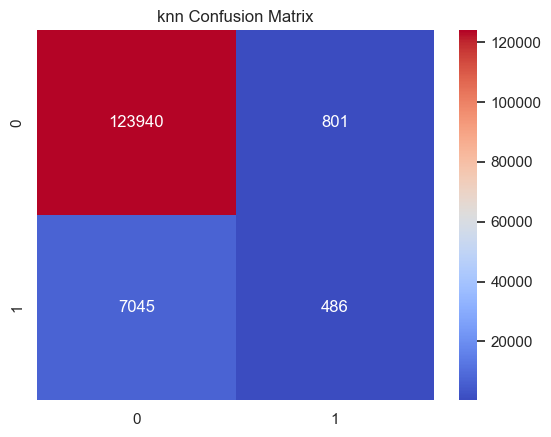

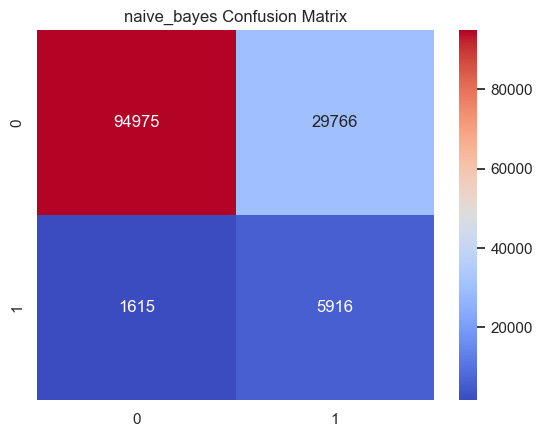

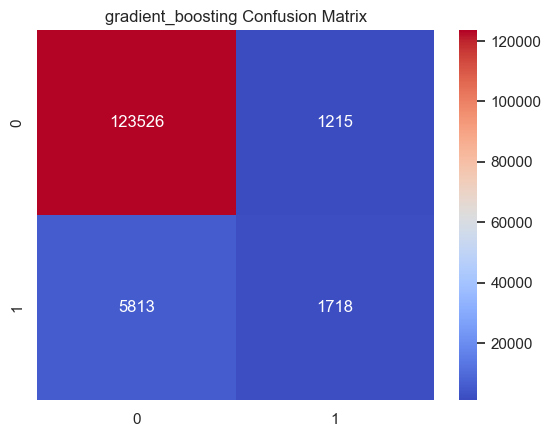

In [215]:
# Pipeline models evaluation
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(x_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [216]:
results = {}

for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(x_test)
    score = pipeline.score(x_test, y_test)
    results[name] = {
        "Score": score,
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
    }

In [217]:
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="F1-Score", ascending=False))

                        Score  Precision    Recall  F1-Score
gradient_boosting    0.946867   0.934029  0.946867  0.935674
logistic_regression  0.946255   0.933087  0.946255  0.935186
random_forest        0.945385   0.930789  0.945385  0.932806
knn                  0.940683   0.913842  0.940683  0.920406
decision_tree        0.908711   0.916437  0.908711  0.912427
naive_bayes          0.762754   0.936736  0.762754  0.824943
